In [43]:
import pandas as pd
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,StackingClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score


In [44]:
df=pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.duplicated().sum()

np.int64(1)

In [45]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [46]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


<Axes: ylabel='target'>

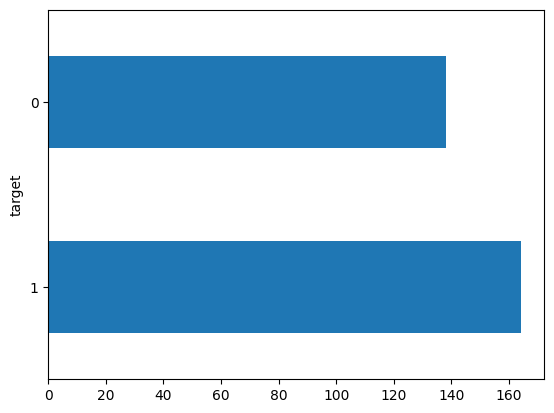

In [47]:
df.target.value_counts().plot.barh()

<Axes: ylabel='count'>

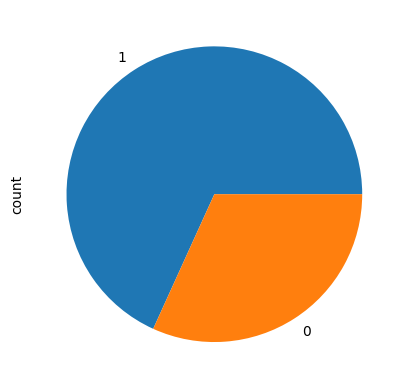

In [48]:
df.sex.value_counts().plot.pie()

In [49]:
X=df.drop('target',axis=1)
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
baseM=[
    ('rf',RandomForestClassifier(n_estimators=50,random_state=42)),
    ('kn',KNeighborsClassifier(n_neighbors=5)),
    ('lr',LogisticRegression(max_iter=1000)) # Increased max_iter

]
#level 1
meta_model=GradientBoostingClassifier(n_estimators=100,random_state=42)

In [55]:
stackingModel=StackingClassifier(
estimators=baseM,
final_estimator=meta_model,
cv=5
 )

In [56]:
stackingModel.fit(X_train,y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=42)),
                               ('kn', KNeighborsClassifier()),
                               ('lr', LogisticRegression(max_iter=1000))],
                   final_estimator=GradientBoostingClassifier(random_state=42))

In [57]:
y_predict=stackingModel.predict(X_test)
print('Accuracy score:',accuracy_score(y_test,y_predict))
print('Precision:',precision_score(y_test,y_predict))

Accuracy score: 0.819672131147541
Precision: 0.8387096774193549


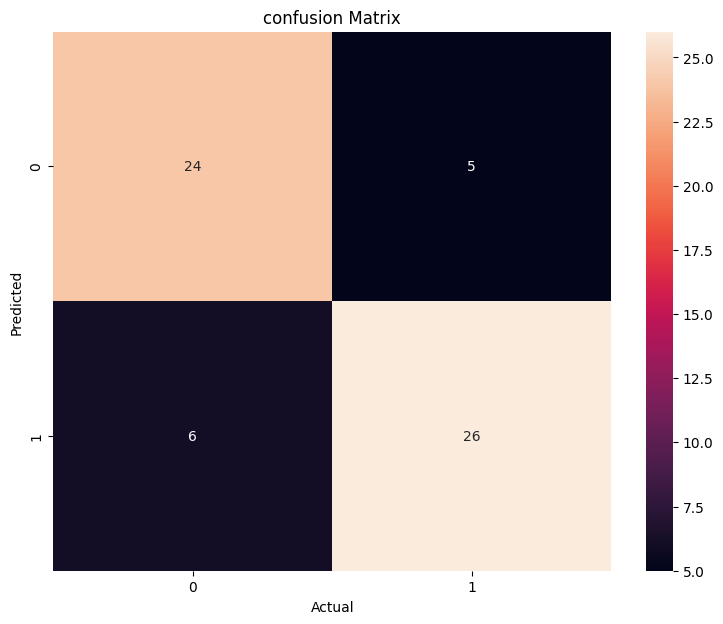

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,7))
plt.title('confusion Matrix')
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,fmt='d')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

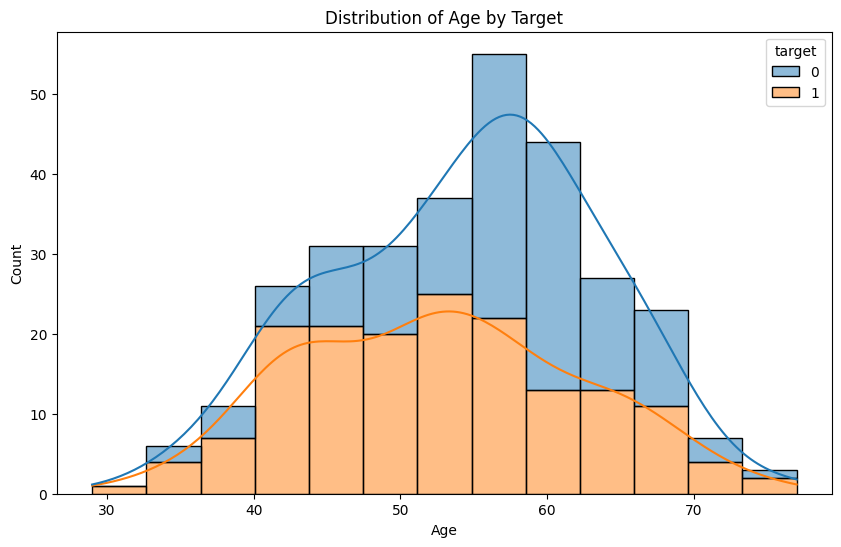

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', multiple='stack', kde=True)
plt.title('Distribution of Age by Target')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()